In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1) # to add some noise to the data
y_clean = 4 + 3 * X

In [3]:
GD_model = SGDRegressor(max_iter=1000, eta0=0.001)
GD_model.fit(X, y.squeeze())

SGDRegressor(eta0=0.001)

In [4]:
y_hat = GD_model.predict(X)

In [5]:
GD_model.intercept_, GD_model.coef_

(array([3.5153853]), array([3.47915262]))

In [7]:
mean_squared_error(y, y_hat)

1.092983750326973

In [8]:
# parameter is used to specify the number of iterations with no improvement in the loss before the training process 
#also can using as : GD_model = SGDRegressor(max_iter=1000, eta0=0.001, n_iter_no_change=5)
GD_model.n_iter_no_change

5

In [12]:
#creates a linearly spaced sequence of numbers, where the first argument is the start value,
#the second argument is the end value, and the third argument specifies the number of points in the sequence (10 in this case).
X_b = np.linspace(X.min(), X.max(), 10).reshape(-1, 1)
X_b

array([[0.00261417],
       [0.22439567],
       [0.44617718],
       [0.66795869],
       [0.8897402 ],
       [1.1115217 ],
       [1.33330321],
       [1.55508472],
       [1.77686622],
       [1.99864773]])

In [11]:
def model_ex(max_iter=0, lr=0, line_style=None):
    _model = SGDRegressor(max_iter=max_iter, eta0=lr)
    _model_fit = _model.fit(X, y)
    _y_hat = _model_fit.predict(X)
    mse = mean_squared_error(y_clean, _y_hat)
    print(f"MSE: {mse}")
    _y_hat_b = _model_fit.predict(X_b)
    line_style["label"] += f" - MSE={mse:0.4f}"
    plt.plot(X_b, _y_hat_b, **line_style)

MSE: 1.705861045600548
MSE: 0.2339677260464774
MSE: 0.07681838164372057
MSE: 0.07481287673030812
MSE: 0.07502831832341636


C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alalwai\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1549: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  war

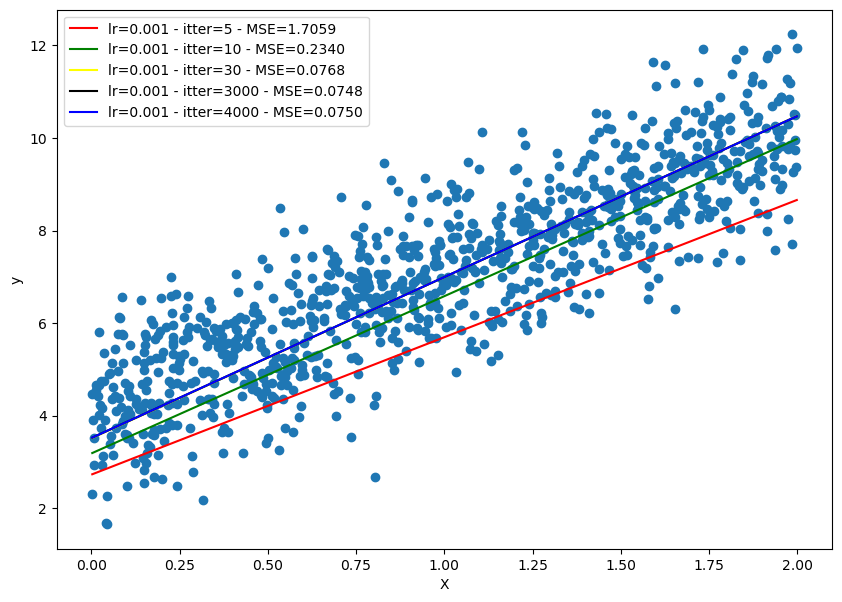

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(X, y)
plt.ylabel("y")
plt.xlabel("X")
# # plt.plot(X_b, y_hat_b)
model_ex(5, 0.001, {"color":"red", "label":"lr=0.001 - itter=5"})
model_ex(10, 0.001, {"color":"green", "label":"lr=0.001 - itter=10"})
model_ex(30, 0.001, {"color":"yellow", "label":"lr=0.001 - itter=30"})
model_ex(3000, 0.001, {"color":"black", "label":"lr=0.001 - itter=3000"})
model_ex(4000, 0.001, {"color":"blue", "label":"lr=0.001 - itter=4000"})
plt.legend()